In [25]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
data_boston = load_boston()
data = pd.DataFrame(data_boston['data'], columns=data_boston['feature_names'])

In [27]:
X, y = load_boston(return_X_y = True)

In [35]:
X_sc = scale(X)
X_sc = pd.DataFrame(X_sc, columns = data_boston['feature_names'])
y_sc = scale(y)

In [36]:
p_values = np.linspace(1, 10, num = 200)

In [39]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
k_scores = []
for p in p_values:
    knn = KNeighborsRegressor(n_neighbors = 5, weights = 'distance', metric = 'minkowski', p = p)
    quality_scores = cross_val_score(knn, X_sc, y_sc, cv = kf, scoring='neg_mean_squared_error')
    k_scores.append(quality_scores.mean())
np.argmax(k_scores) + 1

1

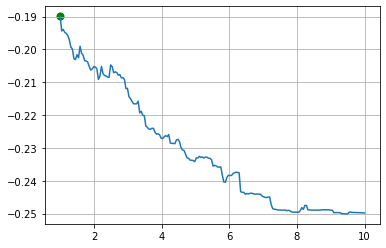

In [43]:
plt.plot(p_values, k_scores)
best_point = np.argmax(k_scores)
plt.grid()
plt.scatter(best_point + 1, k_scores[best_point], c='g', s=50)